In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2024-07-29 07:07:36.511637: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 07:07:36.511790: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 07:07:36.707469: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


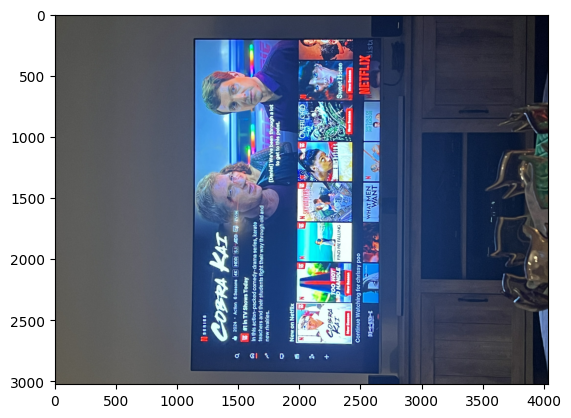

In [2]:
# File path (replace with your actual file path)
file_path = "/kaggle/input/netflix-home-screen/IMG_2706.jpg"
# Read file
image = tf.io.read_file(file_path)
# Decode the JPEG-encoded image to a uint8 tensor
image = tf.image.decode_jpeg(image, channels=3)
# Convert to float32 tensor
image = tf.image.convert_image_dtype(image, tf.float32)
plt.imshow(image)

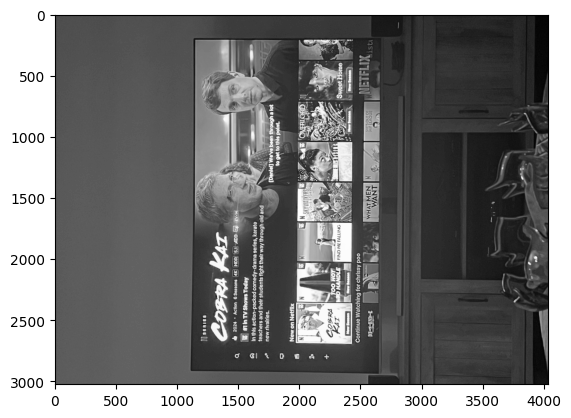

In [3]:
grayscale = tf.image.rgb_to_grayscale(image)
plt.imshow(grayscale, cmap='gray')

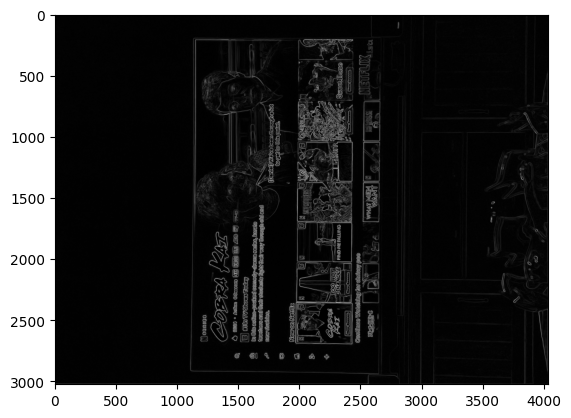

In [15]:
def orthogonal_edge_detection(image, scale_factor=1.0):
    # Define Sobel filters with scaling
    sobel_x = tf.constant([
        [ 1,  1,  1],
        [ 0,  0,  0],
        [-1, -1, -1]
    ], dtype=tf.float32) * scale_factor
    
    sobel_y = tf.constant([
        [ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]
    ], dtype=tf.float32) * scale_factor

    # Reshape filters for conv2d operation
    sobel_x = tf.reshape(sobel_x, [3, 3, 1, 1])
    sobel_y = tf.reshape(sobel_y, [3, 3, 1, 1])

    # Add batch and channel dimensions
    input_image = tf.expand_dims(grayscale, axis=0)

    # Apply Sobel filters
    edge_x = tf.nn.conv2d(input_image, sobel_x, strides=[1, 1, 1, 1], padding='SAME', dilations=2)
    edge_y = tf.nn.conv2d(input_image, sobel_y, strides=[1, 1, 1, 1], padding='SAME', dilations=2)

    # Combine edge responses
    edge_image = tf.sqrt(tf.square(edge_x) + tf.square(edge_y))

    # Remove batch dimension
    edge_image = tf.squeeze(edge_image)

    # Normalize the output
    edge_image = (edge_image - tf.reduce_min(edge_image)) / (tf.reduce_max(edge_image) - tf.reduce_min(edge_image))

    return edge_image

edge_image = sobel_edge_detection(grayscale, 2)
plt.imshow(edge_image, cmap='gray')

Next phase I want only horizontal and vertical edges.
    experimented with dialation
        I think my input is too high resolution.
Then perform find contour.


In [19]:
tf.constant([
        [ 1,  1,  1],
        [ 0,  0,  0],
        [-1, -1, -1]
    ], dtype=tf.float32) * tf.constant([
        [ 0,  0,  0],
        [ 0,  0,  1],
        [1, 1, 1]
    ], dtype=tf.float32)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [-1., -1., -1.]], dtype=float32)>